# Aplicaciones de Minería de Datos II
## Lectura 5: Aplicaciones de Reducción Dimensional y Balanceo
### Octubre, 2023

### El problema de los datos

<center>Alta dimensión = gran número de características (columnas)</center>

<p><b>¿Por qué son malas muchas características?</b>
    <ul>
        <li> Características redundantes: <span style="color:red">se añade más ruido que señal</span></li>
<li> Dificultad de interpretación y visualización </li>
<li> Dificultad para almacenar y procesar los datos (desafío computacional)</li>
<li> La complejidad de la regla de decisión tiende a crecer con el número de características. <span style="color:red">¡Difícil de aprender!</span></li>
        <li>Reglas complejas a medida que aumenta la dimensión (desafío estadístico). 
        </li>
        
</ul>
</p>

<p>Elemetos clave de la reducción dimensional:</p>
<ul><li><b>Selección de características</b>: sólo unas pocas características son relevantes para la tarea de aprendizaje.  <img src="2.png" /></li>
    <li><b>Características latentes</b>: alguna combinación lineal/no lineal de características proporciona una representación más eficiente que las características observadas  <img src="3.png" />  </li>
    <li> El camino dificil: <b>Maximum Likelihood Estimation (MLE)</b>: </li>  
    <ul>
    <li>Definir una función de verosimilitud: probabilidad de los parámetros de las carácterísticas</li>
    <li> Elija los parámetros $w$ (pesos) para maximizar la probabilidad, de que las caraterísticas deseadas, sean las más óptimas</li>
       <li>Dos opciones: Los modelos discriminativos trazan límites en el espacio de datos, mientras que los modelos generativos tratan de modelar cómo se sitúan los datos en todo el espacio.</li>
    </ul>
    <li>El camino fácil: Latent Feature Extraction</li>
    <ul>
        <li>Lineales</li>
        <ul>
           <li> Principal Component Analysis (PCA)</li>
            <li>Factor Analysis</li>
            <li>Independent Component Analysis (ICA)</li>
           </ul>
        </ul>
    <ul>
        <li>No Lineales</li>
        <ul>
           <li> Laplacian Eigenmaps</li>
            <li>Local Linear Embedding (LLE)</li>
           </ul>
        </ul>
</ul>

### Los componentes principales

<p>Los <b>componentes principales</b> son una técnica <i>no supervisada</i> para la creación de nuevas variables que se construyen a partir de combinaciones lineales de las variables iniciales, el objetivo es resumir el contenido de un conjunto de datos de alta dimensión en un conjunto que pueda ser analizado e interpretado de mejor manera.</p>

<ol>
<li>La idea es extraer muestras de malware que sean proyectadas a un nuevo espacio dimensional de sus características originales</li>
<li>El objetivo es simple: <b>comprimir los datos manteniendo la información más relevante</b></li>
<li>La extracción de características es usualmente utilizada para <b>mejorar la eficiencia computacional</b> y reducir <b>la maldición de la dimensionalidad</b></li>
<li><b>Principal component analysis (PCA)</b>: es  una transformación lineal para la reducción de dimensiones de grandes conjuntos de datos como <code>dataset_malwares.csv</code></li>
<li>Se deben de identificar patrones de datos basándose en la <b>correlación de las características</b></li>
<li>Se deben de encontrar las direcciones de la máxima variabilidad de los datos de alta dimensión y proyectarla en otro nuevo <b>espacio de menores dimensiones al original</b></li>
</ol>

<p>Para poder realizar este procedimiento estadístico es necesario tomar en cuenta la <b>matriz de covarianza</b>, la cual indica que tanto varían las dimensiones con respecto la una de la otra.</p>

\begin{equation}
cov(x,y) = \frac{\sum_{i=1}^n(\overline{x}_i - x) (\overline{y}_i - y)}{(n-1)}
\end{equation}

Matriz de covarianza de dos dimensiones:

\begin{equation}
C = \begin{bmatrix}
cov(x,x) & cov(x,y) \\
cov(y,x) & cov(y,y) 
\end{bmatrix}
\end{equation}

![title](1.png)

<p>Los ejes ortogonales (componentes principales) del nuevo sub-espacio pueden ser interpretados como las <i>direcciones de la máxima variabilidad</i> dada la restricción de que los nuevos ejes característicos son ortogonales los unos a los otros. En donde $x_1$ y $x_2$ son los ejes característicos originales, $PC_1$ y $PC_2$ son los componentes principales</p>

#### Escalar y normalizar

<p><b>Problema</b>: las características con largas magnitudes dominan en funciones agregadas ( como la distancia Euclidiana)</p>

<p>Escalamiento min-max:</p>

\begin{equation}
y= \frac{x-min(x)}{max(x)-min(x)} \in [0,1]
\end{equation}

<p>A continuación se enumeran los pasos para realizar el procedimiento de PCA:</p>

<ol>
<li>Escalar el dataset de $n$ dimensiones</li>
<li>Construir una matriz de covarianza</li>
<li>Descomponer la matriz de covarianza en sus <i>eigenvectores</i> y <i>eigenvalores</i></li>
<li>Seleccionar $k$ <i>eigenvectores</i>  que correspondan a los $k$ <i>eigenvalores</i> más largos</li>
<li>Construir una matriz de proyección $\mathbf{W}$ de los mejores <i>eigenvectores</i></li>
<li>Transformar el dataset de $n$ dimensiones utilizando la matriz de proyección $\mathbf{W}$ para obtener el nuevo sub-espacio de $k$ dimensiones</li>
 </ol>

### Ejemplo 2: Analizando el conjunto de datos de malware

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#Importar la clase de PCA
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
#StandardScaler, estandarizar por la media
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('../datasets/dataset_malwares.csv')

In [2]:
dataset.head()

Name  e_magic  e_cblp  e_cp  e_crlc  \
0  VirusShare_a878ba26000edaac5c98eff4432723b3    23117     144     3       0   
1  VirusShare_ef9130570fddc174b312b2047f5f4cf0    23117     144     3       0   
2  VirusShare_ef84cdeba22be72a69b198213dada81a    23117     144     3       0   
3  VirusShare_6bf3608e60ebc16cbcff6ed5467d469e    23117     144     3       0   
4  VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb    23117     144     3       0   

   e_cparhdr  e_minalloc  e_maxalloc  e_ss  e_sp  ...  SectionMaxChar  \
0          4           0       65535     0   184  ...      3758096608   
1          4           0       65535     0   184  ...      3791650880   
2          4           0       65535     0   184  ...      3221225536   
3          4           0       65535     0   184  ...      3224371328   
4          4           0       65535     0   184  ...      3227516992   

   SectionMainChar  DirectoryEntryImport  DirectoryEntryImportSize  \
0                0                     7                       152   
1                0                    16                       311   
2                0                     6                       176   
3                0                     8                       155   
4                0                     2                        43   

   DirectoryEntryExport  ImageDirectoryEntryExport  ImageDirectoryEntryImport  \
0                     0                          0                      54440   
1                     0                          0                     262276   
2                     0                          0                      36864   
3                     0                          0                     356352   
4                     0                          0                      61440   

   ImageDirectoryEntryResource  ImageDirectoryEntryException  \
0                        77824                         73728   
1                       294912                             0   
2                        40960                             0   
3                      1003520                             0   
4                        73728                             0   

   ImageDirectoryEntrySecurity  
0                            0  
1                       346112  
2                            0  
3                     14109472  
4                        90624  

[5 rows x 79 columns]

In [3]:
dataset['e_magic'].describe()

count    19611.0
mean     23117.0
std          0.0
min      23117.0
25%      23117.0
50%      23117.0
75%      23117.0
max      23117.0
Name: e_magic, dtype: float64

In [4]:
y = dataset['Malware']
X = dataset.drop(columns=['Name','Malware'])

In [5]:
X.shape

(19611, 77)

In [8]:
X.head()

e_magic  e_cblp  e_cp  e_crlc  e_cparhdr  e_minalloc  e_maxalloc  e_ss  \
0    23117     144     3       0          4           0       65535     0   
1    23117     144     3       0          4           0       65535     0   
2    23117     144     3       0          4           0       65535     0   
3    23117     144     3       0          4           0       65535     0   
4    23117     144     3       0          4           0       65535     0   

   e_sp  e_csum  ...  SectionMaxChar  SectionMainChar  DirectoryEntryImport  \
0   184       0  ...      3758096608                0                     7   
1   184       0  ...      3791650880                0                    16   
2   184       0  ...      3221225536                0                     6   
3   184       0  ...      3224371328                0                     8   
4   184       0  ...      3227516992                0                     2   

   DirectoryEntryImportSize  DirectoryEntryExport  ImageDirectoryEntryExport  \
0                       152                     0                          0   
1                       311                     0                          0   
2                       176                     0                          0   
3                       155                     0                          0   
4                        43                     0                          0   

   ImageDirectoryEntryImport  ImageDirectoryEntryResource  \
0                      54440                        77824   
1                     262276                       294912   
2                      36864                        40960   
3                     356352                      1003520   
4                      61440                        73728   

   ImageDirectoryEntryException  ImageDirectoryEntrySecurity  
0                         73728                            0  
1                             0                       346112  
2                             0                            0  
3                             0                     14109472  
4                             0                        90624  

[5 rows x 77 columns]

In [6]:
#Escalar el dataset de n dimensiones
sc = StandardScaler()
#Dataset escalado
X_sc = sc.fit_transform(X)
#El dataset se represente por dos componentes (los dos mejores eigenvectores con los dos mejores eigenvalores)
pca = PCA(n_components=2)
#Dataset resumido a dos columnas
X_pca = pca.fit_transform(X_sc)
#Dataframe con el nuevo dataset X_pca
df_pca = pd.DataFrame(X_pca,columns=['pc1','pc2'])
df_pca['y'] = y

In [7]:
df_pca.head()

pc1       pc2  y
0 -0.116883 -0.071578  1
1 -0.304039 -0.128238  1
2 -0.307325 -0.130087  1
3 -0.282957 -0.170493  1
4 -0.087814  0.066060  1

In [10]:
df_pca.shape

(19611, 3)

In [23]:
df_pca[df_pca['y']==0].shape[0]

5012

In [22]:
#Mostrar un gráfico de las dos columnas vs las clases (malware y beningware)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Benignware','Malware']
colors = ['g', 'r']


for target, color in zip(targets,colors):
    indicesToKeep = df_pca['y'] == targets.index(target)
    ax.scatter(df_pca.loc[indicesToKeep, 'pc1']
               , df_pca.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [24]:
#Dividir el conjunto en treneamiento y prueba con el dataset transformado por PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.33, random_state=42)

In [25]:
#C=5 el valor de penalización
svc = SVC(C=5)
svc.fit(X_train,y_train)

SVC(C=5)

In [27]:
y_pred = svc.predict(X_test)
print("Precisón",accuracy_score(y_pred,y_test)*100)
print(classification_report(y_pred,y_test))

Precisón 74.39740420271941
              precision    recall  f1-score   support

           0       0.03      0.58      0.05        73
           1       0.99      0.75      0.85      6399

    accuracy                           0.74      6472
   macro avg       0.51      0.66      0.45      6472
weighted avg       0.98      0.74      0.84      6472



### El problema de los datos no balanceados

<p>La mayoría de los algoritmos de aprendizaje automático funcionan mejor cuando el número de instancias de cada clase es aproximadamente igual. Cuando el número de instancias de una clase es muy superior al de la otra, surgen problemas.</p>

<p>Algunas soluciones propuestas</p>

<ul>
<li>Métodos de muestreo</li>
<li>Métodos sensibles a los costes</li>
<li>Métodos de kernel y aprendizaje activo</li>
</ul>


### Métodos de muestreo Sobremuestreo Submuestreo

<ul>
    <li><b>Submuestreo</b>: eliminando parte de la clase mayoritaria para que tenga menos efecto en el algoritmo de aprendizaje automático.</li>
    <ul>
        <li>La principal ventaja del submuestreo es que se pueden corregir los datos desequilibrados para reducir el riesgo de que su análisis o algoritmo de aprendizaje automático se incline hacia la mayoría. La desventaja es que es que <span style="color:red"> la muestra de la clase mayoritaria elegida podría estar sesgada</span>.</li>
    </ul>
    <li><b>Sobremuestreo</b>: duplicar las clases minoritarias.</li>
    <ul><li>La ventaja del sobremuestreo es que no se pierde información del conjunto de entrenamiento original, ya que mantenemos todos los miembros de las clases minoritarias y mayoritarias. Sin embargo, <span style="color:red">la desventaja es que crece mucho el tamaño del conjunto de entrenamiento</span>.</li></ul>
</ul>

![title](4.png)
![title](5.png)

### ¿Qué es el algoritmo SMOTE (Synthetic Minority Oversampling Technique)?

<p>SMOTE es una técnica de sobremuestreo en la que las muestras sintéticas se generan para la clase minoritaria. Este algoritmo ayuda a superar el problema de sobreajuste que plantea el sobremuestreo aleatorio</p>.
<p>Pasos del algoritmo:</p>
<ol>
<li>Tomar la diferencia entre la muestra y el vecino más cercano.</li>
<li> Multiplicar por un número aleatorio entre $0$ y $1$.</li>
<li> Añadir esta diferencia a la muestra para generar una nueva característica a lo largo de la línea.</li>
<li> Continuar con el siguiente vecino más cercano hasta los n vecinos definidos por el usuario.</li>
</ol>

<p><b>Conclusión</b>: Hace que que el clasificador encuentre un y menos específicas regiones de decisión.</p>

In [29]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [30]:
#Importar la clase de SMOTE
from imblearn.over_sampling import SMOTE 
#collections permite generar conjuntos de datos a partir de una base
from collections import Counter

#objeto de la clase SMOTE (42 es el valor de el genereador pesudoaleatorio)
sm = SMOTE(random_state=42)
#Nuevo conjunto balanceado
X_res, y_res = sm.fit_resample(X_sc, y)
print('Balance de muestras sintéticas %s' % Counter(y_res))

Balance de muestras sintéticas Counter({1: 14599, 0: 14599})


In [31]:
#Dividir el cojunto balanceado en subcojuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=42)

In [32]:
#C=5 el valor de penalización
svc = SVC(C=5)
svc.fit(X_train,y_train)

SVC(C=5)

In [34]:
y_pred = svc.predict(X_test)
print("Precisión",accuracy_score(y_pred,y_test)*100)
print(classification_report(y_pred,y_test))

Precisión 97.10045662100457
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4262
           1       0.98      0.96      0.97      4498

    accuracy                           0.97      8760
   macro avg       0.97      0.97      0.97      8760
weighted avg       0.97      0.97      0.97      8760



### Prueba con PCA

In [40]:
pca = PCA(n_components=3)
X_pca_smote = pca.fit_transform(X_res)
df_pca_smote = pd.DataFrame(X_pca_smote,columns=['pc1','pc2','pc3'])
df_pca_smote['y'] = y_res

In [41]:
df_pca_smote.head()

pc1       pc2       pc3  y
0  0.069825  2.863539 -1.932966  1
1 -0.385903 -0.826036 -1.003697  1
2 -0.414533 -1.543052 -0.558008  1
3 -0.386051 -1.757114 -0.911421  1
4 -0.169629 -1.722156 -0.438917  1

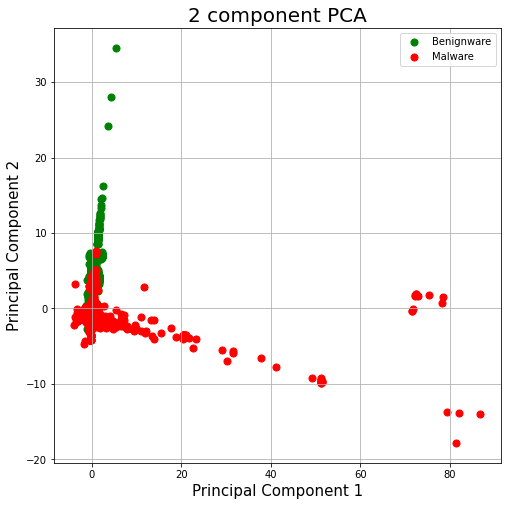

In [44]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Benignware','Malware']
colors = ['g','r']


for target, color in zip(targets,colors):
    indicesToKeep = df_pca_smote['y'] == targets.index(target)
    ax.scatter(df_pca_smote.loc[indicesToKeep, 'pc1']
               , df_pca_smote.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

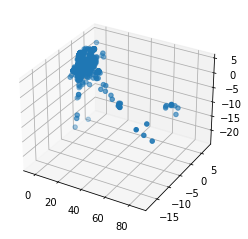

In [49]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(df_pca_smote.loc[indicesToKeep, 'pc1'],
             df_pca_smote.loc[indicesToKeep, 'pc2'],
            df_pca_smote.loc[indicesToKeep, 'pc3'])
plt.show()

In [53]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection="3d")
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Benignware','Malware']
colors = ['g','r']


for target, color in zip(targets,colors):
    indicesToKeep = df_pca_smote['y'] == targets.index(target)
    ax.scatter3D(df_pca_smote.loc[indicesToKeep, 'pc1']
               , df_pca_smote.loc[indicesToKeep, 'pc2']
                ,df_pca_smote.loc[indicesToKeep, 'pc3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_smote, y_res, test_size=0.30, random_state=42)

In [20]:
svc = SVC(C=5)
svc.fit(X_train,y_train)

SVC(C=5)

In [21]:
y_pred = svc.predict(X_test)
print("Accuracy",accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

Accuracy 0.9404109589041096
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4274
           1       0.95      0.93      0.94      4486

    accuracy                           0.94      8760
   macro avg       0.94      0.94      0.94      8760
weighted avg       0.94      0.94      0.94      8760



### Ejercicio

<ol>
    <li>Evalué el  dataset <code>Phishing_Legitimate_full.csv</code> relacionado a campañas de Phishing:</li>

<p><i>Este conjunto de datos contiene $48$ características extraídas de $5,000$ páginas web de phishing y $5,000$ páginas web legítimas, que fueron descargadas desde enero hasta mayo de $2015$ y desde mayo hasta junio de $2017$. Se emplea una técnica mejorada de extracción de características aprovechando el marco de automatización del navegador (es decir, Selenium WebDriver), que es más preciso y robusto en comparación con el enfoque de análisis basado en expresiones regulares.</i></p>
<p><i>Los investigadores y expertos en anti-phishing pueden encontrar este conjunto de datos útil para el análisis de características de phishing, la realización de experimentos rápidos de prueba de concepto o la evaluación comparativa de modelos de clasificación de phishing.</i></p>
<p><b>Referencia</b>: Tan, Choon Lin ($2018$), “Phishing Dataset for Machine Learning: Feature Evaluation”, Mendeley Data, V1, doi: 10.17632/h3cgnj8hft.1</p>
<li>Reduce las dimensiones, mediante el algoritmo de PCA con dos componentes.</li>
    <li>Genera un modelo con los siguientes estimadores utilizando <i>k-fold-cross-validation</i> con $10$ fojas
    <ul>
<li>Máquina de Soporte Vectorial</li>
<li>Regresión Logística</li>
<li>Árboles de Decisión</li>
<li>Random Forest</li>
    </ul>
</li>
    <p>Si es necesario, ajuste prámetros.</p>
<li>Genera sus respectivas matrices de confusión, reportes de desempeño y compare la efectividas de los modelos resultantes.</li>
</ol>